In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Preprocessing and Exploratory Analysis

In [65]:
cars = pd.read_csv("../car_price_prediction.csv")
cars

ID  Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS   RX 450        2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467     -          HONDA      FIT        2006  Hatchback   
3      45769185   3607   862           FORD   Escape        2011       Jeep   
4      45809263  11726   446          HONDA      FIT        2014  Hatchback   
...         ...    ...   ...            ...      ...         ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0                  Yes    Hybrid           3.5  186005 km        6.0   
1                   No    Petrol             3  192000 km        6.0   
2                   No    Petrol           1.3  200000 km        4.0   
3                  Yes    Hybrid           2.5  168966 km        4.0   
4                  Yes    Petrol           1.3   91901 km        4.0   
...                ...       ...           ...        ...        ...   
19232              Yes       CNG     2.0 Turbo  300000 km        4.0   
19233              Yes    Petrol           2.4  161600 km        4.0   
19234              Yes    Diesel             2  116365 km        4.0   
19235              Yes    Diesel             2   51258 km        4.0   
19236              Yes    Hybrid           2.4  186923 km        4.0   

      Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0         Automatic          4x4  04-May        Left wheel  Silver       12  
1         Tiptronic          4x4  04-May        Left wheel   Black        8  
2          Variator        Front  04-May  Right-hand drive   Black        2  
3         Automatic          4x4  04-May        Left wheel   White        0  
4         Automatic        Front  04-May        Left wheel  Silver        4  
...             ...          ...     ...               ...     ...      ...  
19232        Manual         Rear  02-Mar        Left wheel  Silver        5  
19233     Tiptronic        Front  04-May        Left wheel     Red        8  
19234     Automatic        Front  04-May        Left wheel    Grey        4  
19235     Automatic        Front  04-May        Left wheel   Black        4  
19236     Automatic        Front  04-May        Left wheel   White       12  

[19237 rows x 18 columns]

## Preprocessing

In [66]:
# Check if the dataset contains NaN/null values
cars.isnull().values.any()

False

In [67]:
cars.dtypes

ID                    int64
Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [68]:
# Check price for outliers by z-test and look for vals greater than 3 standard deviations
# from mean
price_outliers = cars[(np.abs(stats.zscore(cars["Price"])) >= 3)]

In [69]:
# From market research, it is clear that the OpelCombo entry is a misentry and should be removed
# Handle Levy
ln = []
for i in cars["Levy"]:
    try:
        ln += [int(i)]
    except:
        ln += [np.NaN]

nplm = np.array(ln)    
nplm = np.nan_to_num(nplm)
cars["Levy_(Numeric)"] = nplm

# Handle leather interior
leather_unique = list(set(cars["Leather interior"]))   # Get all unique drive category
cars["Leather_Interior_Numeric"] = [leather_unique.index(x) for x in cars["Leather interior"]]

# Handle mileage
cars["Mileage(km)_Numeric"] = [int(x.split(" ")[0]) for x in cars["Mileage"]]

# Handle wheel
wheel_unique = list(set(cars["Wheel"]))   # Get all unique Wheels
cars["Wheel_Numeric"] = [wheel_unique.index(x) for x in cars["Wheel"]]



In [25]:
manufacturers_unique = list(set(cars["Manufacturer"]))   # Get all unqiue manufacturers
models_unique = list(set(cars["Model"]))   # Get all unique models
gearbox_unique = list(set(cars["Gear box type"]))   # Get all unique gearboxes
color_unique = list(set(cars["Color"]))   # Get all unique colors
wheel_unique = list(set(cars["Wheel"]))   # Get all unique Wheels
doors_unique = list(set(cars["Doors"]))   # Get all unique doors
drivewheels_unique = list(set(cars["Drive wheels"]))   # Get all unique drive wheels
volume_unique = list(set(cars["Engine volume"]))   # Get all unique drive engine volumes
fuel_unique = list(set(cars["Fuel type"]))   # Get all unique drive engine fuels
category_unique = list(set(cars["Category"]))   # Get all unique drive category
leather_unique = list(set(cars["Leather interior"]))   # Get all unique drive category

#print(f"There are {len(manufacturer_set)} unique manufacturers and {len(models_set)} unique models. ")

In [26]:
# Convert Mileage to numeric


# Add columns to our dataframe containing numerical encodings of all string columns
cars["Manufacturer_Numeric"] = [manufacturers_unique.index(x) for x in cars["Manufacturer"]]
cars["Model_Numeric"] = [models_unique.index(x) for x in cars["Model"]]
cars["Gear_box_Numeric"] = [gearbox_unique.index(x) for x in cars["Gear box type"]]
cars["Color_Numeric"] = [color_unique.index(x) for x in cars["Color"]]
cars["Wheel_Numeric"] = [wheel_unique.index(x) for x in cars["Wheel"]]
cars["Doors_Numeric"] = [doors_unique.index(x) for x in cars["Doors"]]
cars["Drive_Wheels_Numeric"] = [drivewheels_unique.index(x) for x in cars["Drive wheels"]]
cars["Engine_Volume_Numeric"] = [volume_unique.index(x) for x in cars["Engine volume"]]
cars["Fuel_Type_Numeric"] = [fuel_unique.index(x) for x in cars["Fuel type"]]
cars["Category_Numeric"] = [category_unique.index(x) for x in cars["Category"]]
cars["Leather_Interior_Numeric"] = [leather_unique.index(x) for x in cars["Leather interior"]]
cars["Mileage(km)_Numeric"] = [int(x.split(" ")[0]) for x in cars["Mileage"]]

# Verify that our numeric encoding worked correctly by checking every numeric representation
# matches the correct index in our unique lists. 
print(all([manufacturers_unique[x] == y for x, y in zip(cars["Manufacturer_Numeric"], cars["Manufacturer"])]))
print(all([models_unique[x] == y for x, y in zip(cars["Model_Numeric"], cars["Model"])]))
print(all([gearbox_unique[x] == y for x, y in zip(cars["Gear_box_Numeric"], cars["Gear box type"])]))
print(all([color_unique[x] == y for x, y in zip(cars["Color_Numeric"], cars["Color"])]))
print(all([wheel_unique[x] == y for x, y in zip(cars["Wheel_Numeric"], cars["Wheel"])]))
print(all([doors_unique[x] == y for x, y in zip(cars["Doors_Numeric"], cars["Doors"])]))
print(all([drivewheels_unique[x] == y for x, y in zip(cars["Drive_Wheels_Numeric"], cars["Drive wheels"])]))
print(all([volume_unique[x] == y for x, y in zip(cars["Engine_Volume_Numeric"], cars["Engine volume"])]))
print(all([fuel_unique[x] == y for x, y in zip(cars["Fuel_Type_Numeric"], cars["Fuel type"])]))
print(all([category_unique[x] == y for x, y in zip(cars["Category_Numeric"], cars["Category"])]))
print(all([leather_unique[x] == y for x, y in zip(cars["Leather_Interior_Numeric"], cars["Leather interior"])]))

ln = []
for i in cars["Levy"]:
    try:
        ln += [int(i)]
    except:
        ln += [np.NaN]

nplm = np.array(ln)    
nplm = np.nan_to_num(nplm)
cars["Levy_(Numeric)"] = nplm
cars_processed = cars.select_dtypes(include=np.number)

True
True
True
True
True
True
True
True
True
True
True


In [27]:
# cars_processed
price_outliers = cars_processed[(np.abs(stats.zscore(cars["Price"])) >= 3)]
# price_outliers.index

In [28]:
#cars_processed.iloc[[16983]]
cars_processed = cars_processed.drop(16983)
cars_processed = cars_processed.drop(8541)
cars_processed = cars_processed.drop(1225)
cars_processed = cars_processed.drop(["ID"], axis=1)
cars_processed

Price  Prod. year  Cylinders  Airbags  Manufacturer_Numeric  \
0      13328        2010        6.0       12                    22   
1      16621        2011        6.0        8                    36   
2       8467        2006        4.0        2                    35   
3       3607        2011        4.0        0                    21   
4      11726        2014        4.0        4                    35   
...      ...         ...        ...      ...                   ...   
19232   8467        1999        4.0        5                    31   
19233  15681        2011        4.0        8                    19   
19234  26108        2010        4.0        4                    19   
19235   5331        2007        4.0        4                    36   
19236    470        2012        4.0       12                    19   

       Model_Numeric  Gear_box_Numeric  Color_Numeric  Wheel_Numeric  \
0                752                 2             15              0   
1               1168                 0             13              0   
2               1087                 3             13              1   
3                922                 2              4              0   
4               1087                 2             15              0   
...              ...               ...            ...            ...   
19232           1247                 1             15              0   
19233            510                 0             10              0   
19234            445                 2              3              0   
19235           1458                 2             13              0   
19236            510                 2              4              0   

       Doors_Numeric  Drive_Wheels_Numeric  Engine_Volume_Numeric  \
0                  1                     1                     70   
1                  1                     1                     18   
2                  1                     2                      4   
3                  1                     1                     80   
4                  1                     2                      4   
...              ...                   ...                    ...   
19232              2                     0                     93   
19233              1                     2                     59   
19234              1                     2                     99   
19235              1                     2                     99   
19236              1                     2                     59   

       Fuel_Type_Numeric  Category_Numeric  Leather_Interior_Numeric  \
0                      1                 6                         0   
1                      2                 6                         1   
2                      2                 7                         1   
3                      1                 6                         0   
4                      2                 7                         0   
...                  ...               ...                       ...   
19232                  0                 4                         0   
19233                  2                 9                         0   
19234                  4                 6                         0   
19235                  4                 6                         0   
19236                  1                 9                         0   

       Mileage(km)_Numeric  Levy_(Numeric)  
0                   186005          1399.0  
1                   192000          1018.0  
2                   200000             0.0  
3                   168966           862.0  
4                    91901           446.0  
...                    ...             ...  
19232               300000             0.0  
19233               161600           831.0  
19234               116365           836.0  
19235                51258          1288.0  
19236               186923           753.0  

[19234 rows x 17 columns]

## Exploratory Analysis

In [103]:
# Summary stats
cars_processed.describe()

Price    Prod. year     Cylinders       Airbags  \
count   19234.000000  19234.000000  19234.000000  19234.000000   
mean    17113.065717   2010.912551      4.582666      6.583030   
std     18278.647663      5.667786      1.199513      4.319807   
min         1.000000   1939.000000      1.000000      0.000000   
25%      5331.000000   2009.000000      4.000000      4.000000   
50%     13172.000000   2012.000000      4.000000      6.000000   
75%     22063.000000   2015.000000      4.000000     12.000000   
max    308906.000000   2020.000000     16.000000     16.000000   

       Manufacturer_Numeric  Model_Numeric  Gear_box_Numeric  Color_Numeric  \
count          19234.000000   19234.000000       19234.00000   19234.000000   
mean              24.734949     814.675782           1.73630       7.180046   
std               17.837281     457.412306           0.84345       3.982475   
min                0.000000       0.000000           0.00000       0.000000   
25%                7.000000     481.000000           2.00000       5.000000   
50%               25.000000     763.000000           2.00000       6.000000   
75%               33.000000    1263.000000           2.00000      11.000000   
max               64.000000    1589.000000           3.00000      15.000000   

       Wheel_Numeric  Doors_Numeric  Drive_Wheels_Numeric  \
count   19234.000000   19234.000000          19234.000000   
mean        0.077155       1.912655              1.549444   
std         0.266844       0.400518              0.698040   
min         0.000000       0.000000              0.000000   
25%         0.000000       2.000000              1.000000   
50%         0.000000       2.000000              2.000000   
75%         0.000000       2.000000              2.000000   
max         1.000000       2.000000              2.000000   

       Engine_Volume_Numeric  Fuel_Type_Numeric  Category_Numeric  \
count           19234.000000       19234.000000      19234.000000   
mean               46.363263           2.833056          3.022148   
std                31.789619           1.290550          2.603991   
min                 0.000000           0.000000          0.000000   
25%                21.000000           2.000000          0.000000   
50%                31.000000           2.000000          3.000000   
75%                77.000000           3.000000          3.000000   
max               106.000000           6.000000         10.000000   

       Leather_Interior_Numeric  Mileage(km)_Numeric  Levy_(Numeric)  
count              19234.000000         1.923400e+04    19234.000000  
mean                   0.274618         1.532469e+06      632.519861  
std                    0.446333         4.840764e+07      567.635091  
min                    0.000000         0.000000e+00        0.000000  
25%                    0.000000         7.015675e+04        0.000000  
50%                    0.000000         1.260090e+05      642.000000  
75%                    1.000000         1.889720e+05      917.000000  
max                    1.000000         2.147484e+09    11714.000000

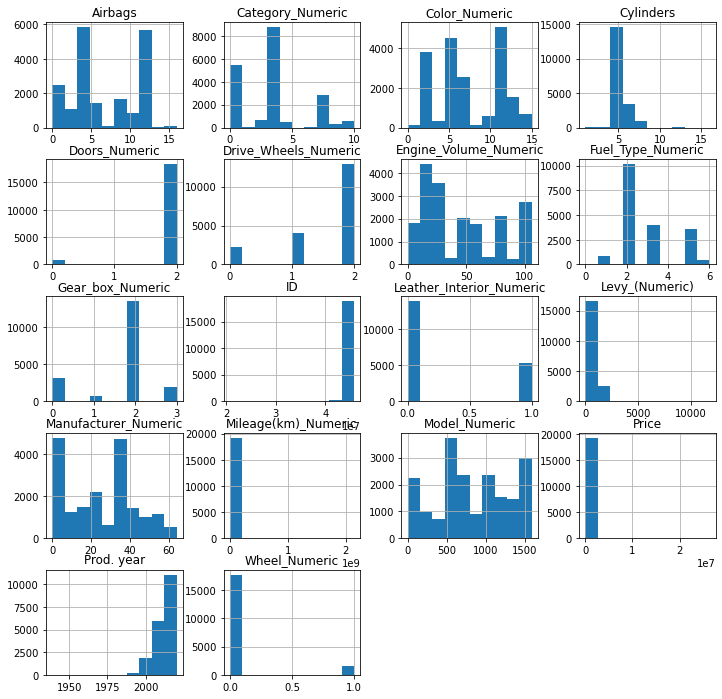

In [104]:
plt.rcParams["figure.figsize"] = (12, 12)
cars.hist()
plt.show()
# plt.hist(cars_processed["Price"], bins=40)
# plt.show()

Text(0, 0.5, 'Price')

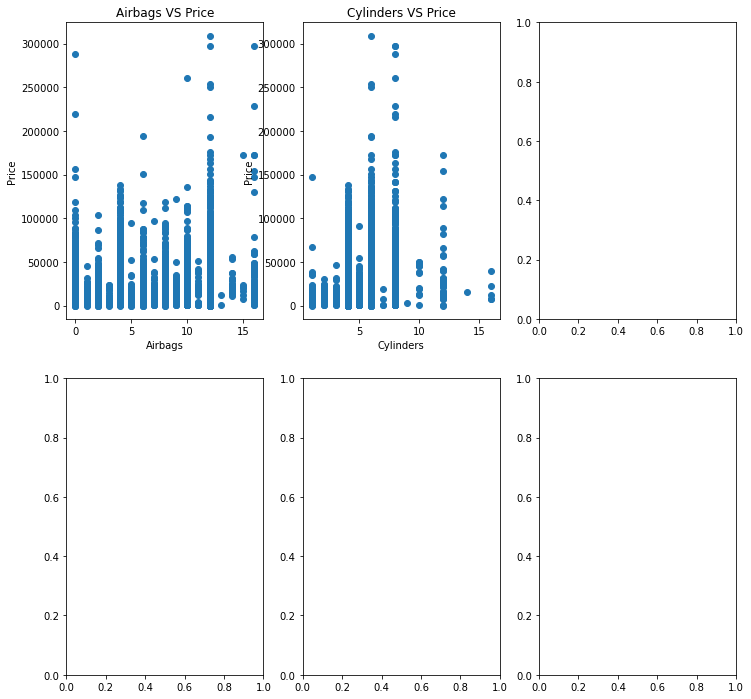

In [105]:
# plt.rcParams["figure.figsize"]
fig, axes = plt.subplots(2, 3)

# Plot airbags vs price
axes[0, 0].scatter(cars_processed["Airbags"], cars_processed["Price"])
axes[0, 0].set_title("Airbags VS Price")
axes[0, 0].set_xlabel("Airbags")
axes[0, 0].set_ylabel("Price")

# Plot cylinders vs price
axes[0, 1].scatter(cars_processed["Cylinders"], cars_processed["Price"])
axes[0, 1].set_title("Cylinders VS Price")
axes[0, 1].set_xlabel("Cylinders")
axes[0, 1].set_ylabel("Price")

In [15]:
corr_matrix = cars_processed.corr()
corr_matrix.style.background_gradient(cmap="coolwarm")

In [18]:
vif = pd.DataFrame()
vif["features"] = cars_processed.columns
vif["vif_Factor"] = [variance_inflation_factor(cars_processed.values, i) for i in range(cars_processed.shape[1])]
vif

features  vif_Factor
0                      Price    2.117419
1                 Prod. year  138.689277
2                  Cylinders   24.852519
3                    Airbags    4.148427
4       Manufacturer_Numeric    7.123689
5              Model_Numeric    4.193019
6           Gear_box_Numeric    6.512396
7              Color_Numeric    4.601173
8              Wheel_Numeric    1.307143
9              Doors_Numeric   26.764998
10      Drive_Wheels_Numeric    8.707136
11     Engine_Volume_Numeric    5.978039
12         Fuel_Type_Numeric    5.193728
13          Category_Numeric   17.379288
14  Leather_Interior_Numeric    1.943457
15       Mileage(km)_Numeric    1.003469
16            Levy_(Numeric)    2.867105

In [12]:
model = smf.ols(formula='Price ~ Airbags + Manufacturer_Numeric',
                data=cars_processed).fit()
  
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     203.7
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           2.96e-88
Time:                        19:52:36   Log-Likelihood:            -2.1584e+05
No. Observations:               19234   AIC:                         4.317e+05
Df Residuals:                   19231   BIC:                         4.317e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.258e+04 

In [32]:
pd.get_dummies(cars).columns

Index(['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags',
       'Manufacturer_Numeric', 'Model_Numeric', 'Gear_box_Numeric',
       'Color_Numeric', 'Wheel_Numeric',
       ...
       'Color_Green', 'Color_Grey', 'Color_Orange', 'Color_Pink',
       'Color_Purple', 'Color_Red', 'Color_Silver', 'Color_Sky blue',
       'Color_White', 'Color_Yellow'],
      dtype='object', length=10074)

In [70]:
cars = cars.drop(["Manufacturer"], axis=1)
cars = cars.drop(["Model"], axis=1)
cars = cars.drop(["Levy"], axis=1)
cars = cars.drop(["Leather interior"], axis=1)
cars = cars.drop(["Mileage"], axis=1)
cars = cars.drop(["Wheel"], axis=1)
test = pd.get_dummies(cars)

ID  Price  Prod. year  Cylinders  Airbags  Levy_(Numeric)  \
0      45654403  13328        2010        6.0       12          1399.0   
1      44731507  16621        2011        6.0        8          1018.0   
2      45774419   8467        2006        4.0        2             0.0   
3      45769185   3607        2011        4.0        0           862.0   
4      45809263  11726        2014        4.0        4           446.0   
...         ...    ...         ...        ...      ...             ...   
19232  45798355   8467        1999        4.0        5             0.0   
19233  45778856  15681        2011        4.0        8           831.0   
19234  45804997  26108        2010        4.0        4           836.0   
19235  45793526   5331        2007        4.0        4          1288.0   
19236  45813273    470        2012        4.0       12           753.0   

       Leather_Interior_Numeric  Mileage(km)_Numeric  Wheel_Numeric  \
0                             0               186005              0   
1                             1               192000              0   
2                             1               200000              1   
3                             0               168966              0   
4                             0                91901              0   
...                         ...                  ...            ...   
19232                         0               300000              0   
19233                         0               161600              0   
19234                         0               116365              0   
19235                         0                51258              0   
19236                         0               186923              0   

       Category_Cabriolet  ...  Color_Green  Color_Grey  Color_Orange  \
0                       0  ...            0           0             0   
1                       0  ...            0           0             0   
2                       0  ...            0           0             0   
3                       0  ...            0           0             0   
4                       0  ...            0           0             0   
...                   ...  ...          ...         ...           ...   
19232                   0  ...            0           0             0   
19233                   0  ...            0           0             0   
19234                   0  ...            0           1             0   
19235                   0  ...            0           0             0   
19236                   0  ...            0           0             0   

       Color_Pink  Color_Purple  Color_Red  Color_Silver  Color_Sky blue  \
0               0             0          0             1               0   
1               0             0          0             0               0   
2               0             0          0             0               0   
3               0             0          0             0               0   
4               0             0          0             1               0   
...           ...           ...        ...           ...             ...   
19232           0             0          0             1               0   
19233           0             0          1             0               0   
19234           0             0          0             0               0   
19235           0             0          0             0               0   
19236           0             0          0             0               0   

       Color_White  Color_Yellow  
0                0             0  
1                0             0  
2                0             0  
3                1             0  
4                0             0  
...            ...           ...  
19232            0             0  
19233            0             0  
19234            0             0  
19235            0             0  
19236            1             0  

[19237 rows x 160 columns]

In [48]:
set(cars["Wheel"])

{'Left wheel', 'Right-hand drive'}

In [55]:
cars

ID  Price  Levy   Manufacturer    Model  Prod. year   Category  \
0      45654403  13328  1399          LEXUS   RX 450        2010       Jeep   
1      44731507  16621  1018      CHEVROLET  Equinox        2011       Jeep   
2      45774419   8467     -          HONDA      FIT        2006  Hatchback   
3      45769185   3607   862           FORD   Escape        2011       Jeep   
4      45809263  11726   446          HONDA      FIT        2014  Hatchback   
...         ...    ...   ...            ...      ...         ...        ...   
19232  45798355   8467     -  MERCEDES-BENZ  CLK 200        1999      Coupe   
19233  45778856  15681   831        HYUNDAI   Sonata        2011      Sedan   
19234  45804997  26108   836        HYUNDAI   Tucson        2010       Jeep   
19235  45793526   5331  1288      CHEVROLET  Captiva        2007       Jeep   
19236  45813273    470   753        HYUNDAI   Sonata        2012      Sedan   

      Leather interior Fuel type Engine volume  ... Gear box type  \
0                  Yes    Hybrid           3.5  ...     Automatic   
1                   No    Petrol             3  ...     Tiptronic   
2                   No    Petrol           1.3  ...      Variator   
3                  Yes    Hybrid           2.5  ...     Automatic   
4                  Yes    Petrol           1.3  ...     Automatic   
...                ...       ...           ...  ...           ...   
19232              Yes       CNG     2.0 Turbo  ...        Manual   
19233              Yes    Petrol           2.4  ...     Tiptronic   
19234              Yes    Diesel             2  ...     Automatic   
19235              Yes    Diesel             2  ...     Automatic   
19236              Yes    Hybrid           2.4  ...     Automatic   

       Drive wheels   Doors             Wheel   Color Airbags Levy_(Numeric)  \
0               4x4  04-May        Left wheel  Silver      12         1399.0   
1               4x4  04-May        Left wheel   Black       8         1018.0   
2             Front  04-May  Right-hand drive   Black       2            0.0   
3               4x4  04-May        Left wheel   White       0          862.0   
4             Front  04-May        Left wheel  Silver       4          446.0   
...             ...     ...               ...     ...     ...            ...   
19232          Rear  02-Mar        Left wheel  Silver       5            0.0   
19233         Front  04-May        Left wheel     Red       8          831.0   
19234         Front  04-May        Left wheel    Grey       4          836.0   
19235         Front  04-May        Left wheel   Black       4         1288.0   
19236         Front  04-May        Left wheel   White      12          753.0   

       Leather_Interior_Numeric  Mileage(km)_Numeric  Wheel_Numeric  
0                             0               186005              0  
1                             1               192000              0  
2                             1               200000              1  
3                             0               168966              0  
4                             0                91901              0  
...                         ...                  ...            ...  
19232                         0               300000              0  
19233                         0               161600              0  
19234                         0               116365              0  
19235                         0                51258              0  
19236                         0               186923              0  

[19237 rows x 22 columns]

In [73]:
test = pd.get_dummies(cars)
corr_matrix = test.corr()
corr_matrix.style.background_gradient(cmap="coolwarm")